In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols
plt.style.use('ggplot')

In [2]:
path = '/Users/ryota/data/Kaggle/falldeteciton.csv'
df = pd.read_csv(path); df.size

114674

In [3]:
N = 1000
p = 1
model = ols('HR ~ TIME', data = df[:N], hasconst=True) # allow constant, default is True 
m = model.fit()
infl = m.get_influence()
sm_fr = infl.summary_frame(); sm_fr[:2]

,dfb_Intercept,dfb_TIME,cooks_d,dffits,dffits_internal,hat_diag,standard_resid,student_resid
0,0.030580,-0.024454,0.000498,0.031543,0.031553,0.002506,0.629467,0.629277
1,0.017298,-0.014205,0.000156,0.017648,0.017655,0.002840,0.330821,0.330674


In [4]:
t = 3*(p+1)/N
mask=sm_fr.cooks_d > t

Text(0, 0.5, 'HR')

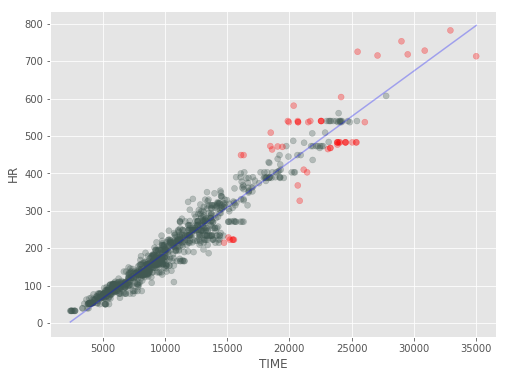

In [5]:
c=['#415952', '#f35134', '#243AB5']
tm=np.array(df[:N].sort_values(by=['TIME'])['TIME'].tolist())
inx=sm_fr[mask].index.tolist()
carray=np.array([c[0]]*N)
carray[inx]='red'

fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(df['TIME'][:N], df['HR'][:N], c=carray, alpha=0.3)
plt.plot(tm, (lambda x: x*m.params[1] + m.params[0])(tm), c='b', alpha=0.3)
plt.xlabel('{}'.format(model.exog_names[1]))
plt.ylabel('{}'.format(model.endog_names))

In [6]:
t = 2*np.sqrt((p+1)/(N-p-1))
mask=sm_fr.dffits > t

Text(0, 0.5, 'HR')

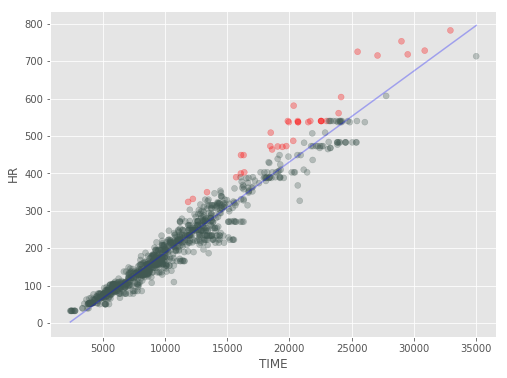

In [7]:
tm=np.array(df[:N].sort_values(by=['TIME'])['TIME'].tolist())
inx=sm_fr[mask].index.tolist()
carray=np.array([c[0]]*N)
carray[inx]='red'

fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(df['TIME'][:N], df['HR'][:N], c=carray, alpha=0.3)
plt.plot(tm, (lambda x: x*m.params[1] + m.params[0])(tm), c='b', alpha=0.3)
plt.xlabel('{}'.format(model.exog_names[1]))
plt.ylabel('{}'.format(model.endog_names))